# Non Parametric Hawkes Processes 

### Note

1. Kernels do not have specific shapes(eg. exponential decay). No assumption on their shape 
2. Example simulates from piece-wise and exponential functions
3. Learning using **EM(expectation maximization)** algorithm 

Source: https://x-datainitiative.github.io/tick/modules/hawkes.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import (SimuHawkes, HawkesKernelTimeFunc, HawkesKernelExp,
                         HawkesEM)
from tick.base import TimeFunction
from tick.plot import plot_hawkes_kernels

## Time functions

Defines a kernel function as piecewise function

1. t_values - point in the timeline 
2. y_values - their corresponding intesity value
3. Our time functions can be almost anything: linear, sinsoidal, logarithmic, etc. 




In [62]:
run_time = 30000

t_values1 = np.array([0, 1, 1.5, 2., 3.5], dtype=float)
y_values1 = np.array([0, 0.2, 0, 0.1, 0.], dtype=float)

tf1 = TimeFunction([t_values1, y_values1],
                   inter_mode=TimeFunction.InterConstRight, dt=0.1)
kernel1 = HawkesKernelTimeFunc(tf1)

t_values2 = np.linspace(0, 4, 20)
y_values2 = np.maximum(0., np.sin(t_values2) / 4)
# y_values2 = np.maximum(0., np.cos(t_values2) / 4)
# y_values2 = np.maximum(0., np.log(t_values2) / 4)


tf2 = TimeFunction([t_values2, y_values2])
kernel2 = HawkesKernelTimeFunc(tf2)


### Exploring the time function 
tf1.value(0), tf1.value(.9), tf1.value(1.0)

(0.0, 0.0, 0.2)

## Simulation 

In [63]:
baseline = np.array([0.1, 0.3])

hawkes = SimuHawkes(baseline=baseline, end_time=run_time, verbose=False,
                    seed=2334)

hawkes.set_kernel(0, 0, kernel1)
hawkes.set_kernel(0, 1, HawkesKernelExp(.5, .7))
hawkes.set_kernel(1, 1, kernel2)

hawkes.simulate()

## Learning 


Expectation Maximization Implementation - Learning for non-parametric kernels 

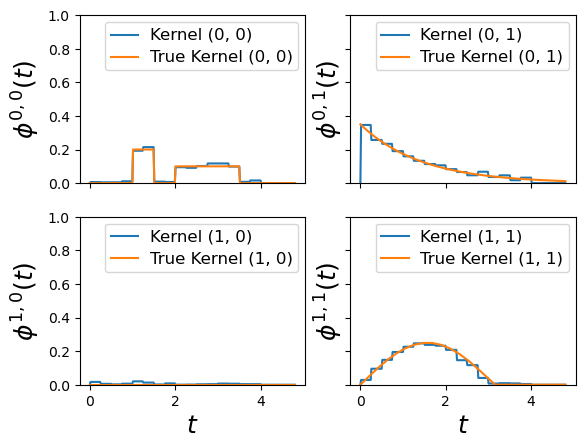

In [66]:
HawkesEM??
em = HawkesEM(4, kernel_size=16, n_threads=8, verbose=False, tol=1e-3)
em.fit(hawkes.timestamps)

fig = plot_hawkes_kernels(em, hawkes=hawkes, show=False)

for ax in fig.axes:
    ax.set_ylim([0, 1])
plt.show()